# 1. Introduction to part 3 of the lab

## 1.1 CMIP6 data

In this part of the exercises, you will be working with output data from CMIP6. 

### 1.1.1. What is CMIP6
CMIP6 refers to the Sixth Phase of the Coupled Model Intercomparison Project. It is a framework for coordinating and promoting the systematic evaluation of Earth System Models (ESMs) and their components. 
Basically all modelling groups who develop ESMs do the same simulations with the same input (forcing!), and then we compare the results. 


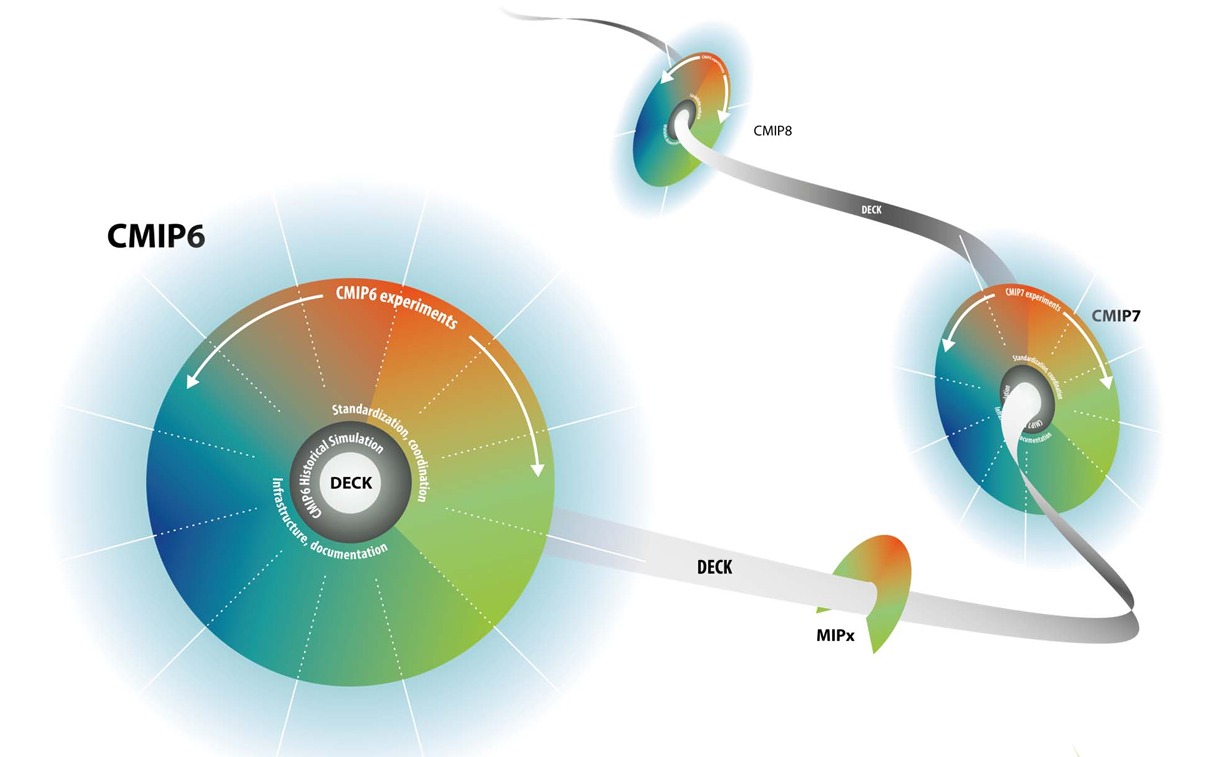
Source:https://www.wcrp-climate.org/wgcm-cmip/wgcm-cmip6


- Project under World Climate Research Programme (WCRP) 
- Since 1995 CMIP has coordinated climate model experiments 
- Defines common experiment protocols, forcings and output. 
- More than 30 model groups participate'


### 1.1.2 Useful links (you don't need them for this exercise):
- Database for data request: http://clipc-services.ceda.ac.uk/dreq/index.html
    - Search for variable names: http://clipc-services.ceda.ac.uk/dreq/mipVars.html
    - Search for experiments: http://clipc-services.ceda.ac.uk/dreq/experiments.html
- Overview: https://www.wcrp-climate.org/wgcm-cmip/wgcm-cmip6
- ES-DOCs: https://search.es-doc.org/


- GMD special issue with articles explaining all MIPs in CMIP6 :
https://www.geosci-model-dev.net/special_issue590.html
- General CMIP6 website https://www.wcrp-climate.org/wgcm-cmip/wgcm-cmip6
- Guidance documents: (https://pcmdi.llnl.gov/CMIP6/)
- Emissions/Forcing datasets (https://esgf-node.llnl.gov/projects/input4mips/)
- Model and experiment documentation (https://search.es-doc.org/)
- Emission visualising: https://eccad.aeris-data.fr

### 1.1.3. What's so great about CMIP?
- All data is open and free to use
- Homogenized and standardized outputs
- Same variable name
- Same experiments

### 1.1.4. Experiments (DECK)
The core of CMIP6 are the DECK experiments, which stands for Diagnostic, Evaluation and Characterization of Klima. 
The core experiments are listed in the table below. 

![image](https://user-images.githubusercontent.com/17406708/139691209-ec237004-637b-4947-bb12-104d78a2fe44.png)

Each experiment has a purpose. In this exercise we will primarily look at the historical simulations, which are often used to evaluate the models and their performancs. In these simulations, we try to feed the models emissions and forcing as close to reality as possible. 

## 1.2 Coding 
You will mostly be given the the code needed to read the data, and will mainly do the plotting on your own. It might though, be good to know that we are mainly using a python package called **xarray** to read and do calculations on the dataset. [Xarray](https://xarray.dev/) is excellent for dealing with multidimensional datasets (like latitude, longitude, time, height) and is very similar (and built on) [Pandas](https://pandas.pydata.org/) for those who might know it. Some introduction follows below. 

## 1.3 File format: NetCDF

A netCDF (Network Common Data Form) file is a self-describing, machine-independent data format commonly used in scientific communities, especially in Earth and atmospheric sciences. It stores multi-dimensional arrays of scientific data (e.g., variables such as temperature, pressure, or precipitation) along with metadata that describes the data (e.g., units, spatial and temporal coordinates, variable names, etc.).

NetCDF files are designed to be easily accessible and usable by a wide range of software programs, including specialized scientific software and general-purpose data analysis tools. This makes netCDF a convenient format for sharing and exchanging scientific data, and it is widely used in many fields, including climate science, atmospheric science, oceanography, and others. The netCDF format is maintained by the Unidata Program at the University Corporation for Atmospheric Research (UCAR).

## 1.4 ACTION POINT: 

### ALTERNATIVE 1: Install neccesary packages on your computer

In order to do this exercise, you will need to install the following packages on your computer:

From the default conda:
- xarray 
- intake
- s3fs

from conda-forge:
- intake-esm
- gcsfs
- zarr
- cartopy

You can for example do this by installing the conda environment in the file [environment.yml](environment.yml).

For example run in the terminal:
```bash
conda env create -f environment.yml
conda activate earth-analytics-python
```


**Download the HadCRUT dataset:** 
- Here is the download link: https://crudata.uea.ac.uk/cru/data/temperature/HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean.nc
- Put the data in the subfolder of this folder called 'Data'


### ALTERNATIVE 2: Download the data to your computer

The data you need is all collected here: https://stockholmuniversity.box.com/s/y2gm2knry1z1qz0ju9h3qa48l2l2rlge
Put all the data in the Data folder and copy and run the following code:
```python
ds_noresm = xr.open_dataset('Data/CMIP.NCC.NorESM2-LM.historical.Amon.gn.nc')
ds_cesm = xr.open_dataset('Data/CMIP.NCAR.CESM2-WACCM.historical.Amon.gn.nc')
```

**If you can use this step, you can skip step 2. "Read in the CMIP6 data"**

**We will do this together in the exercise session**

## 1.5 Some coding introduction: Xarray++

### 1.5.1 Open file
In this exercise you will be given code which reads the data directly from the database, but in general to read a netcdf file in xarray, you can run:

```python
import xarray as xr
ds = xr.open_dataset('path/to/netcdf/file.nc'
```


Let's try opening the HadCRUT dataset (more on this below), which is a historical dataset fro 

In [3]:
import xarray as xr
ds_hadcrut = xr.open_dataset('Data/HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean.nc', drop_variables=['time_bnds','latitude_bnds','longitude_bnds','realization_bnds'])

Simply running the following line will give you a html interface to have a look at the data, which contains both metadata (information about the data), variables and coordinates.

In [4]:
ds_hadcrut

<xarray.Dataset>
Dimensions:      (time: 2076, latitude: 36, longitude: 72)
Coordinates:
  * time         (time) datetime64[ns] 1850-01-16T12:00:00 ... 2022-12-16T12:...
  * latitude     (latitude) float64 -87.5 -82.5 -77.5 -72.5 ... 77.5 82.5 87.5
  * longitude    (longitude) float64 -177.5 -172.5 -167.5 ... 167.5 172.5 177.5
    realization  int64 ...
Data variables:
    tas_mean     (time, latitude, longitude) float64 ...
Attributes:
    comment:      2m air temperature over land blended with sea water tempera...
    history:      Data set built at: 2023-01-10T22:32:59+00:00
    institution:  Met Office Hadley Centre / Climatic Research Unit, Universi...
    licence:      HadCRUT5 is licensed under the Open Government Licence v3.0...
    reference:    C. P. Morice, J. J. Kennedy, N. A. Rayner, J. P. Winn, E. H...
    source:       CRUTEM.5.0.1.0 HadSST.4.0.0.0
    title:        HadCRUT.5.0.1.0 blended land air temperature and sea-surfac...
    version:      HadCRUT.5.0.1.0
    Conventions:  CF-1.7

### 1.5.2. Averaging: 
When we have a multidimensional dataset, averaging can be done over one, or many dimensions. For example, we might want to average over latitude and longitude:

In [5]:
ds_mean = ds_hadcrut.mean(dim = ['latitude','longitude']) # Notice how the names in brackets correspond to the coordinate names in the file

**(There is a problem with the way the global average is calculated above, can you spot it? )

Notice how the resulting dataset only contains time as a dimension? (And bnds, but we will not look at this) 

In [6]:
ds_mean

<xarray.Dataset>
Dimensions:      (time: 2076)
Coordinates:
  * time         (time) datetime64[ns] 1850-01-16T12:00:00 ... 2022-12-16T12:...
    realization  int64 ...
Data variables:
    tas_mean     (time) float64 -0.9086 -0.2955 -0.6202 ... 1.337 0.7283 0.948

### 1.5.3. Very quick plotting:

When you want to look at a specific variable in a dataset, you write 
```python
ds['name_of_variable']
```
followed by whatever operation you want. 

We may now try to plot the variable:

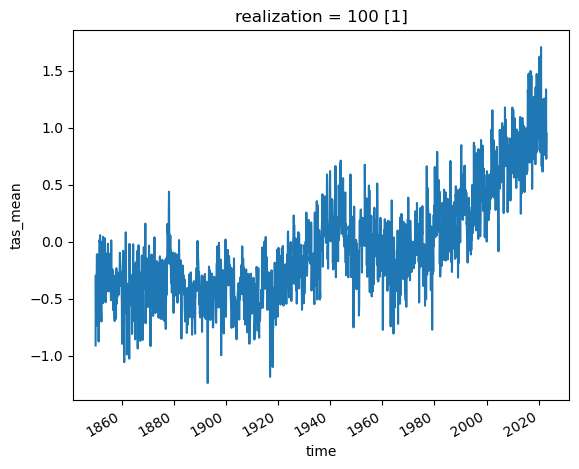

In [7]:
ds_mean['tas_mean'].plot()

Now we can adjust the plot by including other setting:

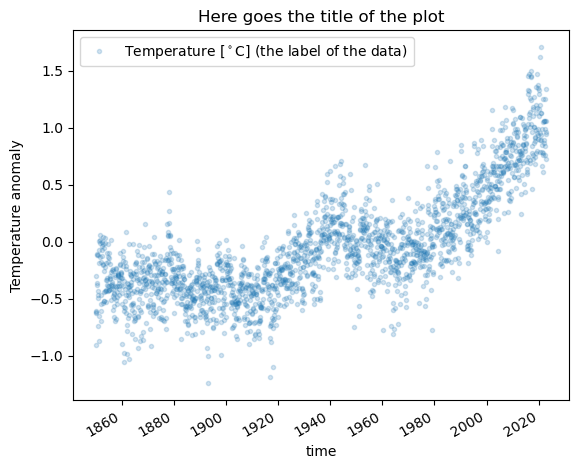

In [8]:
import matplotlib.pyplot as plt 

ds_mean['tas_mean'].plot(
    marker='.',  # makes dots for eacch datapoint
    linewidth=0, # removes the line between the datapoints
    alpha = .2,  # makes the datapoints sea-through (lower alpha, more see through)
    label='Temperature [$^\circ$C] (the label of the data)',
)
plt.title('Here goes the title of the plot')
plt.ylabel('Temperature anomaly') # label on the y axis
plt.legend() # makes the plocct legend appear

### 1.5.4. Resample and rolling: make yearly averages and rolling averages

Notice how the data above is very noisy? Often in climate data, we want to look at yearly or decadal averages or do a rolling average. 


The method 'resample' will group the data in periods in time. You can use it like this (the 'Y' stands for year, if you want other periods, you could do 'D' for day, 'M' for month', or '10Y' for 10 years):

In [9]:
ds_yearly = ds_mean.resample(time = 'Y').mean()

Notice how the resample is followed by .mean()? The function added after resampel will be performed on the groups in question. In this case it results in yearly mean values. Let's now add the yearly mean values to the plot

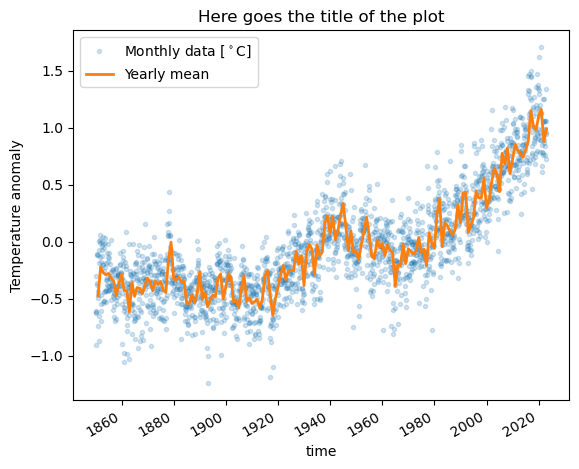

In [10]:
import matplotlib.pyplot as plt 

ds_mean['tas_mean'].plot(
    marker='.',  # makes dots for eacch datapoint
    linewidth=0, # removes the line between the datapoints
    alpha = .2,  # makes the datapoints sea-through (lower alpha, more see through)
    label='Monthly data [$^\circ$C]',
)

ds_yearly['tas_mean'].plot(
    # marker='.',  # makes dots for eacch datapoint
    linewidth=2, # removes the line between the datapoints
    alpha = 1,  # makes the datapoints sea-through (lower alpha, more see through)
    label='Yearly mean',
)
plt.title('Here goes the title of the plot')
plt.ylabel('Temperature anomaly') # label on the y axis
plt.legend() # makes the plot legend appear

Finally let's do a 10 year rolling mean: 



In [11]:
ds_rolling = ds_yearly.rolling(
    time = 10, # number of points in rolling window
    center= True # sets the new time label in the midle of the window
).mean() # this is the operation performed on the rolling window

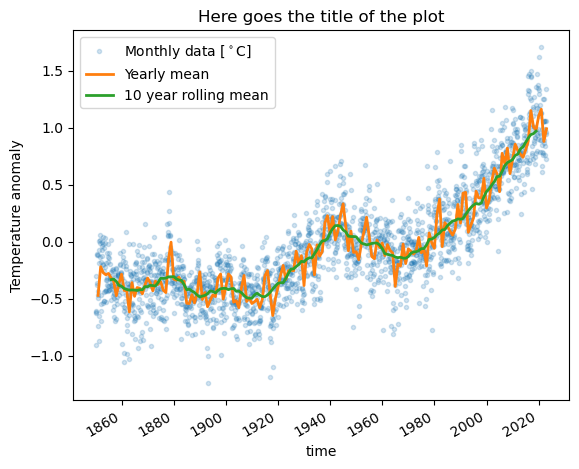

In [12]:
import matplotlib.pyplot as plt 

ds_mean['tas_mean'].plot(
    marker='.',  # makes dots for eacch datapoint
    linewidth=0, # removes the line between the datapoints
    alpha = .2,  # makes the datapoints sea-through (lower alpha, more see through)
    label='Monthly data [$^\circ$C]',
)

ds_yearly['tas_mean'].plot(
    # marker='.',  # makes dots for eacch datapoint
    linewidth=2, # removes the line between the datapoints
    alpha = 1,  # makes the datapoints sea-through (lower alpha, more see through)
    label='Yearly mean',
)


ds_rolling['tas_mean'].plot(
    # marker='.',  # makes dots for eacch datapoint
    linewidth=2, # removes the line between the datapoints
    alpha = 1,  # makes the datapoints sea-through (lower alpha, more see through)
    label='10 year rolling mean',
)

plt.title('Here goes the title of the plot')
plt.ylabel('Temperature anomaly') # label on the y axis
plt.legend() # makes the plot legend appear

### 1.5.5. Selecting subsets of the data

Sometimes we might want to look at a particular period for example, or just one day. In xarray we use .sel (for select) or .isel (index-select) for this. 

The syntax is as follows:
```python
ds.sel(coordinate_name='value_we_want')
```
or if you just want the first, second etc. one, you can use index:
```python
ds.isel(coordinate_name=0)
```


In [13]:
ds_mean.sel(time='1900-01')


<xarray.Dataset>
Dimensions:      (time: 1)
Coordinates:
  * time         (time) datetime64[ns] 1900-01-16T12:00:00
    realization  int64 ...
Data variables:
    tas_mean     (time) float64 -0.657

In [14]:
ds_mean.isel(time=0)


<xarray.Dataset>
Dimensions:      ()
Coordinates:
    time         datetime64[ns] 1850-01-16T12:00:00
    realization  int64 ...
Data variables:
    tas_mean     float64 -0.9086

To select a period, we can use slice like this:


In [15]:
ds_mean.sel(time=slice('1900-01-01','1905-01-01'))

<xarray.Dataset>
Dimensions:      (time: 60)
Coordinates:
  * time         (time) datetime64[ns] 1900-01-16T12:00:00 ... 1904-12-16T12:...
    realization  int64 ...
Data variables:
    tas_mean     (time) float64 -0.657 -0.3354 -0.1803 ... -0.3616 -0.5373

# 2. Read in the CMIP6 data (you do not need to understand this part -- you can skip to point 3) 

In [16]:
import s3fs
import xarray as xr
import intake
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

## 2.1 Open CMIP6 online catalog

In [17]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
col

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,700
grid_label,10
zstore,514818
dcpp_init_year,60


## 2.2 Search for data 

In [18]:
cat = col.search(source_id=['CESM2-WACCM','NorESM2-LM'], experiment_id=['historical'], table_id=['Amon'], variable_id=['tas'], )
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NCAR,CESM2-WACCM,historical,r2i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2-WACCM/histori...,NaN,20190227
1,CMIP,NCAR,CESM2-WACCM,historical,r3i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2-WACCM/histori...,NaN,20190227
2,CMIP,NCAR,CESM2-WACCM,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2-WACCM/histori...,NaN,20190227
3,CMIP,NCC,NorESM2-LM,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCC/NorESM2-LM/historica...,NaN,20190815
4,CMIP,NCC,NorESM2-LM,historical,r3i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCC/NorESM2-LM/historica...,NaN,20190920
5,CMIP,NCC,NorESM2-LM,historical,r2i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCC/NorESM2-LM/historica...,NaN,20190920


## 2.3. Create a dictionary from the list of dataset

In [19]:
dset_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True, },)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


/var/folders/94/vwhfq3pn1gzf467zrfgldhbx4lgk1t/T/ipykernel_3651/3019884173.py:1: DeprecationWarning: cdf_kwargs and zarr_kwargs are deprecated and will be removed in a future version. Please use xarray_open_kwargs instead.
  dset_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True, },)


In [20]:
list(dset_dict.keys())

['CMIP.NCAR.CESM2-WACCM.historical.Amon.gn',
 'CMIP.NCC.NorESM2-LM.historical.Amon.gn']

In [21]:
ds_cesm = dset_dict['CMIP.NCAR.CESM2-WACCM.historical.Amon.gn'].drop(['lat_bnds','lon_bnds','time_bnds'])
# Quick fix to change format of time 
ds_cesm['time'] = ds_cesm.indexes['time'].to_datetimeindex()


/var/folders/94/vwhfq3pn1gzf467zrfgldhbx4lgk1t/T/ipykernel_3651/3122797757.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds_cesm['time'] = ds_cesm.indexes['time'].to_datetimeindex()


In [22]:
ds_noresm = dset_dict['CMIP.NCC.NorESM2-LM.historical.Amon.gn'].drop(['lat_bnds','lon_bnds','time_bnds'])
ds_noresm['time'] = ds_noresm.indexes['time'].to_datetimeindex()


/var/folders/94/vwhfq3pn1gzf467zrfgldhbx4lgk1t/T/ipykernel_3651/3304325480.py:2: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds_noresm['time'] = ds_noresm.indexes['time'].to_datetimeindex()


# 3. Look at the two loaded datasets

We have just loaded temperature records for two CMIP models: NorESM and CESM. 
Notive that there is a coordinate called "member_id". This if for different ensamble members. More on this later. 

In [23]:
ds_cesm

<xarray.Dataset>
Dimensions:         (lat: 192, lon: 288, member_id: 3, dcpp_init_year: 1,
                     time: 1980)
Coordinates:
  * lat             (lat) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lon             (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * time            (time) datetime64[ns] 1850-01-15T12:00:00 ... 2014-12-15T...
  * member_id       (member_id) object 'r1i1p1f1' 'r2i1p1f1' 'r3i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 nan
Data variables:
    tas             (member_id, dcpp_init_year, time, lat, lon) float32 dask.array<chunksize=(1, 1, 600, 192, 288), meta=np.ndarray>
Attributes: (12/49)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             674885.0
    contact:                          cesm_cmip6@ucar.edu
    data_specs_version:               01.00.29
    ...                               ...
    intake_esm_attrs:table_id:        Amon
    intake_esm_attrs:variable_id:     tas
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         20190227
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.NCAR.CESM2-WACCM.historical.Amon.gn

In [24]:
ds_noresm

<xarray.Dataset>
Dimensions:         (lat: 96, lon: 144, member_id: 3, dcpp_init_year: 1,
                     time: 1980)
Coordinates:
    height          float64 2.0
  * lat             (lat) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon             (lon) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * time            (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T...
  * member_id       (member_id) object 'r1i1p1f1' 'r2i1p1f1' 'r3i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 nan
Data variables:
    tas             (member_id, dcpp_init_year, time, lat, lon) float32 dask.array<chunksize=(1, 1, 990, 96, 144), meta=np.ndarray>
Attributes: (12/49)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_time:                      0.0
    branch_time_in_child:             0.0
    cmor_version:                     3.5.0
    contact:                          Please send any requests or bug reports...
    ...                               ...
    intake_esm_attrs:experiment_id:   historical
    intake_esm_attrs:table_id:        Amon
    intake_esm_attrs:variable_id:     tas
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.NCC.NorESM2-LM.historical.Amon.gn

## !Notice the member_id coordinate!


When we run climate simulations, the model evolves quickly away from the observed weather pattern because climate is a chaotic system. One way that we account for this deviation is by running ensambles, meaning we start the model off with slightly different meteorology, so that the modelled weather is different in the different simulations. In the datasets above have the different simulations with the same model, which we can see in the coordinate member_id.  

There are different kinds of ensembles, e.g. model ensembles (runs with different models) and initial condition ensemble (where the initial weather is changed) or perturbed physics ensembles (where the processes are changed slightly to explore the uncertainty). 

If we want to look at just one ensemble member, we run the following: 


In [25]:
ds_cesm.sel(member_id = 'r2i1p1f1')

<xarray.Dataset>
Dimensions:         (lat: 192, lon: 288, dcpp_init_year: 1, time: 1980)
Coordinates:
  * lat             (lat) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lon             (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * time            (time) datetime64[ns] 1850-01-15T12:00:00 ... 2014-12-15T...
    member_id       <U8 'r2i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 nan
Data variables:
    tas             (dcpp_init_year, time, lat, lon) float32 dask.array<chunksize=(1, 600, 192, 288), meta=np.ndarray>
Attributes: (12/49)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             674885.0
    contact:                          cesm_cmip6@ucar.edu
    data_specs_version:               01.00.29
    ...                               ...
    intake_esm_attrs:table_id:        Amon
    intake_esm_attrs:variable_id:     tas
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         20190227
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.NCAR.CESM2-WACCM.historical.Amon.gn

Or you can use index-select (.isel) where you just give the index: 

In [26]:
ds_cesm.isel(member_id =0)

<xarray.Dataset>
Dimensions:         (lat: 192, lon: 288, dcpp_init_year: 1, time: 1980)
Coordinates:
  * lat             (lat) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lon             (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * time            (time) datetime64[ns] 1850-01-15T12:00:00 ... 2014-12-15T...
    member_id       <U8 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 nan
Data variables:
    tas             (dcpp_init_year, time, lat, lon) float32 dask.array<chunksize=(1, 600, 192, 288), meta=np.ndarray>
Attributes: (12/49)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             674885.0
    contact:                          cesm_cmip6@ucar.edu
    data_specs_version:               01.00.29
    ...                               ...
    intake_esm_attrs:table_id:        Amon
    intake_esm_attrs:variable_id:     tas
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         20190227
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.NCAR.CESM2-WACCM.historical.Amon.gn

(For the especially interested: 
The numbers are indices for particular configurations of:

- r: realisation (i.e. ensemble member)
- i: initialisation method
- p: physics
- f: forcing

meaning that the ones we are looking at here are just different realisations (simulations) of the same model with the same i, p and f. )

# Task 3a: Calculating the global average

Use the function below to calculate the global temperature from both models. 
Plot the result for CESM for one ensamble member ( you can choose which one with e.g. ds.sel(member_id='r1i1p1f1')). 

Compare to what we did in the introduction (ds.mean(['lat','lon'])). Which one is wrong and why? 

In [27]:
def calculate_global_average(ds):
    """
    Usage:
    ds_mean = calculate_global_average(ds)
    """
    vlat = 'lat'
    vlon = 'lon'
    if 'latitude' in ds.coords:
        vlat = 'latitude'
        vlon = 'longitude'
    # Compute weights based on the xarray you pass
    weights = np.cos(np.deg2rad(ds[vlat]))
    weights.name = "weights"
    # Compute weighted mean
    var_weighted = ds.weighted(weights)
    weighted_mean = var_weighted.mean((vlon, vlat))
    return weighted_mean
    

## Task 3b: Calculate the yearly average and the 30 year running mean of the global temperature average
(You can use the introduction as an inspiration here). 

- Plot the results.
- How large is the difference between the two models verus the difference between the ensemble members? Just from looking at the results, can you notice any differences between the two models?
- How does the fact that we several ensemble members help us here? Can you think about what kinds of insight this might give us? What kind of uncertainty will it help us overcome? 

# Task 3c: Compare to observations

### Temperature records: HadCRUT5 
Above we did some operations on the HAdCRUT5 dataset downloaded from here:
- https://crudata.uea.ac.uk/cru/data/temperature

Please click on the link and read the information in the FAQ there! 

- Why are the temperatures expressed as anomalies from 1961-1990?
- Calculate the proper average over latitude and longitude average using the we used for the model data
- Calculate and plot the equivalent for the modelled temperature change.
    - Monthly anomalies
    - Yearly means
    - 10 year running means
- Do you see any differences? Can you think of any reasons why they would be different other than that the model is wrong? 
- When comparing models and observations, models usually do better at reproducing the anomaly than the absolute temperature. Why could this be? 

# Task 3d: Plot maps

You have previously gotten some info on how to plot maps. Use this to to plot the average temperature in the first 30 years of the simulations versus the last 30 years.

- Discuss the differences between the models
- Do the same plot for the observations and compare. Try to use 1850-1900 as the reference, because data is quite sparse back in time